In [1]:
import sys, os
from pycocotools.coco import COCO
from torch import nn
import torch
import data_loader

In [2]:
dataDir = '/home/varun/LE-Course/DD/codes_dl/image_captioning'
dataType = 'val2014'
val_images_dir = os.path.join(dataDir,dataType)
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=8.40s)
creating index...
index created!
loading annotations into memory...
Done (t=3.05s)
creating index...
index created!


/home/varun/LE-Course/DD/codes_dl/image_captioning/val2014/COCO_val2014_000000567881.jpg


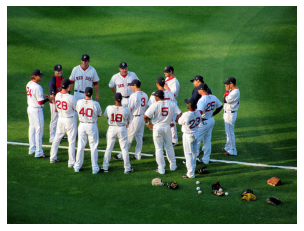

A group of baseball players standing on a field next to each other.
There are some baseball players standing in a green field
A baseball team talks with coaches on the outside of the field.
A baseball team standing in a circle along one of the baselines.
A group of players stand on the field.


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = os.path.join(val_images_dir,img['file_name'])

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [4]:
import sys
from pycocotools.coco import COCO
!pip install nltk
import nltk
nltk.download('punkt')
from data_loader import get_loader
from torchvision import transforms

# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /home/varun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Set the minimum word count threshold.
vocab_threshold = 4

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

loading annotations into memory...
Done (t=0.86s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...


  0%|          | 0/414113 [00:00<?, ?it/s]

Done (t=0.75s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:01<00:00, 6751.11it/s]


In [33]:
from data_loader_validation import get_loader as val_get_loader
# Set the minimum word count threshold.
vocab_threshold = 4

# Specify the batch size.
batch_size = 1

# Obtain the data loader.
val_data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=True)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=2.12s)
creating index...


  0%|          | 620/414113 [00:00<01:06, 6195.06it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:00<00:00, 6830.75it/s]


In [40]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'
sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In [41]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In [42]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 756, 3, 396, 39, 3, 1015, 207, 139, 3, 755, 18]


In [43]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 756, 3, 396, 39, 3, 1015, 207, 139, 3, 755, 18, 1]


In [44]:
sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  756,    3,  396,   39,    3, 1015,  207,  139,    3,
         755,   18,    1])


In [45]:
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 9947


In [46]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79970
value:  9 --- count: 71920
value: 12 --- count: 57652
value: 13 --- count: 37669
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12840
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [47]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler
    
# Obtain the batch.
images, captions = next(iter(data_loader))
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# (Optional) Uncomment the lines of code below to print the pre-processed images and captions.
# print('images:', images)
# print('captions:', captions

sampled indices: [179275, 254494, 45868, 405686, 73974, 284761, 115802, 159770, 201247, 214536, 319656, 172515, 91402, 286014, 408156, 30116, 42478, 62922, 39926, 146977, 174190, 340289, 208236, 257735, 297798, 336733, 22194, 30045, 337423, 47237, 395425, 249191, 104338, 158537, 95322, 2521, 72719, 392663, 348226, 202915, 98834, 232207, 308236, 18268, 205863, 116313, 411794, 179629, 36806, 127253, 36390, 384703, 151803, 375732, 115332, 306285, 198581, 285931, 21156, 407999, 53570, 106662, 132894, 337081]
images.shape: torch.Size([64, 3, 224, 224])
captions.shape: torch.Size([64, 14])


In [48]:
%load_ext autoreload
%autoreload 2

# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
# Specify the dimensionality of the image embedding.
embed_size = 256

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Initialize the encoder. (Optional: Add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
encoder.to(device)
    
# Move last batch of images (from Step 2) to GPU if CUDA is available.   
images = images.to(device)

# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that your encoder satisfies some requirements of the project! :D
assert type(features)==torch.Tensor, "Encoder output needs to be a PyTorch Tensor." 
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([64, 256])


AssertionError: The shape of the encoder output is incorrect.

In [ ]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move the decoder to GPU if CUDA is available.
decoder.to(device)
    
# Move last batch of captions (from Step 1) to GPU if CUDA is available 
captions = captions.to(device)

# Pass the encoder output and captions through the decoder.
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that your decoder satisfies some requirements of the project! :D
assert type(outputs)==torch.Tensor, "Decoder output needs to be a PyTorch Tensor."
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."


In [25]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time
decoder_list = list()
encoder_list = list()
os.makedirs('./models', exist_ok=True)


# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    try:
        if epoch % save_every == 0:
            decoder_list.append(decoder.state_dict())
            encoder_list.append(encoder.state_dict())
    except:
        print('failed to append model for epoch {}'.format(epoch))

    try:
        if epoch % save_every == 0:
            fp = open(os.path.join('./models', 'decoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            fp = open(os.path.join('./models', 'encoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-{}.pkl'.format(epoch)))
            torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-{}.pkl'.format(epoch)))
    except:
        print('failed to save model for epoch {}'.format(epoch))
# Close the training log file.
f.close()

Epoch [1/3], Step [100/6471], Loss: 2.2386, Perplexity: 9.3801
Epoch [1/3], Step [200/6471], Loss: 1.9563, Perplexity: 7.07305
Epoch [1/3], Step [300/6471], Loss: 2.2300, Perplexity: 9.29992
Epoch [1/3], Step [400/6471], Loss: 2.1013, Perplexity: 8.17646
Epoch [1/3], Step [500/6471], Loss: 2.6364, Perplexity: 13.9627
Epoch [1/3], Step [600/6471], Loss: 2.1548, Perplexity: 8.62656
Epoch [1/3], Step [700/6471], Loss: 2.1172, Perplexity: 8.30769
Epoch [1/3], Step [800/6471], Loss: 2.1200, Perplexity: 8.33095
Epoch [1/3], Step [900/6471], Loss: 2.1627, Perplexity: 8.69499
Epoch [1/3], Step [1000/6471], Loss: 1.9388, Perplexity: 6.9505
Epoch [1/3], Step [1100/6471], Loss: 2.0312, Perplexity: 7.62329
Epoch [1/3], Step [1200/6471], Loss: 2.2709, Perplexity: 9.68805
Epoch [1/3], Step [1300/6471], Loss: 2.2138, Perplexity: 9.15078
Epoch [1/3], Step [1400/6471], Loss: 2.1499, Perplexity: 8.58422
Epoch [1/3], Step [1500/6471], Loss: 2.0235, Perplexity: 7.56496
Epoch [1/3], Step [1600/6471], Loss:

In [25]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time
decoder_list = list()
encoder_list = list()
os.makedirs('./models', exist_ok=True)


# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    try:
        if epoch % save_every == 0:
            decoder_list.append(decoder.state_dict())
            encoder_list.append(encoder.state_dict())
    except:
        print('failed to append model for epoch {}'.format(epoch))

    try:
        if epoch % save_every == 0:
            fp = open(os.path.join('./models', 'decoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            fp = open(os.path.join('./models', 'encoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-{}.pkl'.format(epoch)))
            torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-{}.pkl'.format(epoch)))
    except:
        print('failed to save model for epoch {}'.format(epoch))
# Close the training log file.
f.close()

Epoch [1/3], Step [100/6471], Loss: 2.2386, Perplexity: 9.3801
Epoch [1/3], Step [200/6471], Loss: 1.9563, Perplexity: 7.07305
Epoch [1/3], Step [300/6471], Loss: 2.2300, Perplexity: 9.29992
Epoch [1/3], Step [400/6471], Loss: 2.1013, Perplexity: 8.17646
Epoch [1/3], Step [500/6471], Loss: 2.6364, Perplexity: 13.9627
Epoch [1/3], Step [600/6471], Loss: 2.1548, Perplexity: 8.62656
Epoch [1/3], Step [700/6471], Loss: 2.1172, Perplexity: 8.30769
Epoch [1/3], Step [800/6471], Loss: 2.1200, Perplexity: 8.33095
Epoch [1/3], Step [900/6471], Loss: 2.1627, Perplexity: 8.69499
Epoch [1/3], Step [1000/6471], Loss: 1.9388, Perplexity: 6.9505
Epoch [1/3], Step [1100/6471], Loss: 2.0312, Perplexity: 7.62329
Epoch [1/3], Step [1200/6471], Loss: 2.2709, Perplexity: 9.68805
Epoch [1/3], Step [1300/6471], Loss: 2.2138, Perplexity: 9.15078
Epoch [1/3], Step [1400/6471], Loss: 2.1499, Perplexity: 8.58422
Epoch [1/3], Step [1500/6471], Loss: 2.0235, Perplexity: 7.56496
Epoch [1/3], Step [1600/6471], Loss:

In [8]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18]


In [9]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18, 1]


In [10]:
sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1010,  207,  139,    3,
         753,   18,    1])


In [11]:
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 8852


In [13]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79970
value:  9 --- count: 71920
value: 12 --- count: 57652
value: 13 --- count: 37669
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12840
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [14]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler
    
# Obtain the batch.
images, captions = next(iter(data_loader))
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# (Optional) Uncomment the lines of code below to print the pre-processed images and captions.
# print('images:', images)
# print('captions:', captions

sampled indices: [405916, 362026, 38674, 91503, 249720, 368838, 185529, 31444, 74892, 379982]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 14])


In [15]:
%load_ext autoreload
%autoreload 2

# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
# Specify the dimensionality of the image embedding.
embed_size = 256

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Initialize the encoder. (Optional: Add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
encoder.to(device)
    
# Move last batch of images (from Step 2) to GPU if CUDA is available.   
images = images.to(device)

# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that your encoder satisfies some requirements of the project! :D
assert type(features)==torch.Tensor, "Encoder output needs to be a PyTorch Tensor." 
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


In [18]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move the decoder to GPU if CUDA is available.
decoder.to(device)
    
# Move last batch of captions (from Step 1) to GPU if CUDA is available 
captions = captions.to(device)

# Pass the encoder output and captions through the decoder.
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that your decoder satisfies some requirements of the project! :D
assert type(outputs)==torch.Tensor, "Decoder output needs to be a PyTorch Tensor."
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."


type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 14, 8852])


In [24]:
import math


## TODO #1: Select appropriate values for the Python variables below.
batch_size = 64          # batch size
vocab_threshold = 4        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 300           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params = params, lr = 0.001)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

loading annotations into memory...
Done (t=2.27s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=2.61s)
creating index...


  0%|          | 713/414113 [00:00<00:58, 7122.94it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:03<00:00, 6570.41it/s]


In [25]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time
decoder_list = list()
encoder_list = list()
os.makedirs('./models', exist_ok=True)


# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    try:
        if epoch % save_every == 0:
            decoder_list.append(decoder.state_dict())
            encoder_list.append(encoder.state_dict())
    except:
        print('failed to append model for epoch {}'.format(epoch))

    try:
        if epoch % save_every == 0:
            fp = open(os.path.join('./models', 'decoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            fp = open(os.path.join('./models', 'encoder-{}.pkl'.format(epoch)),'w+')
            fp.close()
            torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-{}.pkl'.format(epoch)))
            torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-{}.pkl'.format(epoch)))
    except:
        print('failed to save model for epoch {}'.format(epoch))
# Close the training log file.
f.close()

Epoch [1/3], Step [100/6471], Loss: 2.2386, Perplexity: 9.3801
Epoch [1/3], Step [200/6471], Loss: 1.9563, Perplexity: 7.07305
Epoch [1/3], Step [300/6471], Loss: 2.2300, Perplexity: 9.29992
Epoch [1/3], Step [400/6471], Loss: 2.1013, Perplexity: 8.17646
Epoch [1/3], Step [500/6471], Loss: 2.6364, Perplexity: 13.9627
Epoch [1/3], Step [600/6471], Loss: 2.1548, Perplexity: 8.62656
Epoch [1/3], Step [700/6471], Loss: 2.1172, Perplexity: 8.30769
Epoch [1/3], Step [800/6471], Loss: 2.1200, Perplexity: 8.33095
Epoch [1/3], Step [900/6471], Loss: 2.1627, Perplexity: 8.69499
Epoch [1/3], Step [1000/6471], Loss: 1.9388, Perplexity: 6.9505
Epoch [1/3], Step [1100/6471], Loss: 2.0312, Perplexity: 7.62329
Epoch [1/3], Step [1200/6471], Loss: 2.2709, Perplexity: 9.68805
Epoch [1/3], Step [1300/6471], Loss: 2.2138, Perplexity: 9.15078
Epoch [1/3], Step [1400/6471], Loss: 2.1499, Perplexity: 8.58422
Epoch [1/3], Step [1500/6471], Loss: 2.0235, Perplexity: 7.56496
Epoch [1/3], Step [1600/6471], Loss:

In [25]:
encoder_in = EncoderCNN(embed_size)
decoder_in = DecoderRNN(embed_size, hidden_size, vocab_size)
in_epoch = 3
decoder_in.load_state_dict(torch.load(os.path.join('./models', 'decoder-{}.pkl'.format(in_epoch)),map_location=device))
encoder_in.load_state_dict(torch.load(os.path.join('./models', 'encoder-{}.pkl'.format(in_epoch)),map_location=device))

<All keys matched successfully>

In [32]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time
decoder_list = list()
encoder_list = list()
os.makedirs('./models', exist_ok=True)


# Open the training log file.

total_step = 1

old_time = time.time()

for i_step in range(1, total_step+1):

    if time.time() - old_time > 60:
        old_time = time.time()

    # Randomly sample a caption length, and sample indices with that length.
    indices = val_data_loader.dataset.get_train_indices()
    # Create and assign a batch sampler to retrieve a batch with the sampled indices.
    new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
    data_loader.batch_sampler.sampler = new_sampler

    # Obtain the batch.
    images, captions = next(iter(data_loader))

    # Move batch of images and captions to GPU if CUDA is available.
    images = images.to(device)
    captions = captions.to(device)

    features = encoder_in(images)
    outputs = decoder_in(features, captions)
    
    print(captions.cpu().shape)
    print(outputs.cpu().shape)

    # Calculate the batch loss.
    loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))



AttributeError: 'CoCoDataset' object has no attribute 'caption_lengths'

In [22]:
device

device(type='cpu')